# Problem Set  3

### MACS 30200 
### Xiuyuan Zhang

In [42]:
# import the library 
import random
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set the random seed
random.seed(1234)

### Part 1: Image classification

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 2s 0us/step


In [6]:
train_images, valid_images, train_labels, valid_labels = \
     train_test_split(train_images, train_labels, test_size = 0.16666, random_state = 1234)

#### part (i). Initial test

In [7]:
network_org = models.Sequential()
network_org.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(10, activation='softmax'))
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_org = network_org.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 8s 160us/step - loss: 0.5028 - acc: 0.8388 - val_loss: 0.2880 - val_acc: 0.9055
Epoch 2/200
50000/50000 [==============================] - 9s 179us/step - loss: 0.1560 - acc: 0.9530 - val_loss: 0.1205 - val_acc: 0.9629
Epoch 3/200
50000/50000 [==============================] - 8s 161us/step - loss: 0.0955 - acc: 0.9709 - val_loss: 0.1436 - val_acc: 0.9571
Epoch 4/200
50000/50000 [==============================] - 9s 177us/step - loss: 0.0643 - acc: 0.9799 - val_loss: 0.0938 - val_acc: 0.9713
Epoch 5/200
50000/50000 [==============================] - 8s 162us/step - loss: 0.0465 - acc: 0.9860 - val_loss: 0.1132 - val_acc: 0.9664
Epoch 6/200
50000/50000 [==============================] - 7s 149us/step - loss: 0.0350 - acc: 0.9891 - val_loss: 0.0709 - val_acc: 0.9795
Epoch 7/200
50000/50000 [==============================] - 8s 153us/step - loss: 0.0292 - acc: 0.9917 - val_loss: 0.

50000/50000 [==============================] - 9s 178us/step - loss: 0.0042 - acc: 0.9995 - val_loss: 0.2010 - val_acc: 0.9814
Epoch 117/200
50000/50000 [==============================] - 9s 178us/step - loss: 0.0071 - acc: 0.9992 - val_loss: 0.1756 - val_acc: 0.9838
Epoch 118/200
50000/50000 [==============================] - 8s 159us/step - loss: 0.0105 - acc: 0.9988 - val_loss: 0.1687 - val_acc: 0.9851
Epoch 119/200
50000/50000 [==============================] - 10s 193us/step - loss: 0.0071 - acc: 0.9992 - val_loss: 0.2126 - val_acc: 0.9797
Epoch 120/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.0048 - acc: 0.9991 - val_loss: 0.1682 - val_acc: 0.9826
Epoch 121/200
50000/50000 [==============================] - 9s 190us/step - loss: 0.0043 - acc: 0.9995 - val_loss: 0.1643 - val_acc: 0.9846
Epoch 122/200
50000/50000 [==============================] - 8s 169us/step - loss: 0.0090 - acc: 0.9989 - val_loss: 0.1602 - val_acc: 0.9821
Epoch 123/200
50000/50000 

Epoch 174/200
50000/50000 [==============================] - 7s 140us/step - loss: 1.6986e-04 - acc: 1.0000 - val_loss: 0.2047 - val_acc: 0.9835- acc: 1.000
Epoch 175/200
50000/50000 [==============================] - 7s 139us/step - loss: 0.0131 - acc: 0.9989 - val_loss: 0.2418 - val_acc: 0.9817
Epoch 176/200
50000/50000 [==============================] - 7s 141us/step - loss: 0.0082 - acc: 0.9992 - val_loss: 0.2718 - val_acc: 0.9772
Epoch 177/200
50000/50000 [==============================] - 7s 140us/step - loss: 0.0103 - acc: 0.9990 - val_loss: 0.2158 - val_acc: 0.9826
Epoch 178/200
50000/50000 [==============================] - 7s 140us/step - loss: 0.0067 - acc: 0.9993 - val_loss: 0.2193 - val_acc: 0.9817
Epoch 179/200
50000/50000 [==============================] - 7s 140us/step - loss: 0.0084 - acc: 0.9990 - val_loss: 0.1983 - val_acc: 0.9831
Epoch 180/200
50000/50000 [==============================] - 7s 142us/step - loss: 0.0056 - acc: 0.9994 - val_loss: 0.1916 - val_acc: 0.98

In [8]:
network_org.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


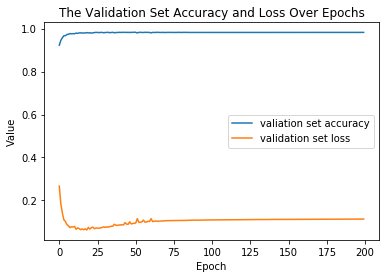

In [25]:
# Plot the validation set accuracy and loss over the epochs
val_acc = result_org.history['val_acc']
val_loss = result_org.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.legend(['valiation set accuracy', 'validation set loss'])
plt.title('The Validation Set Accuracy and Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

##### Identify the epoch where the model's performance degrades based on the validation set ?

One can see that the validaton set loss achieve its lowest value at around epoch 11 and then degrades. It is also worth noting that the validaton set accuracy has a different trend because it still very slightly improving (generally flat) after epoch 25. Since the dataset does not have the balanced class, the single validation accuracy may not a good criteria for evaluation. Thus, according to the combination of validation loss and accuracy, ** epoch 11** as the degrading point.

#### part (ii). Implement dropout

In [12]:
# Fit a dropout Model
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(128, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(128, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(128, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10, activation='softmax'))
network_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = network_dropout.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.1356 - acc: 0.6091 - val_loss: 0.3483 - val_acc: 0.9043
Epoch 2/200
50000/50000 [==============================] - 5s 91us/step - loss: 0.4383 - acc: 0.8781 - val_loss: 0.2068 - val_acc: 0.9408
Epoch 3/200
50000/50000 [==============================] - 4s 77us/step - loss: 0.2994 - acc: 0.9222 - val_loss: 0.1667 - val_acc: 0.9556
Epoch 4/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.2470 - acc: 0.9372 - val_loss: 0.1466 - val_acc: 0.9601
Epoch 5/200
50000/50000 [==============================] - 4s 78us/step - loss: 0.2124 - acc: 0.9476 - val_loss: 0.1309 - val_acc: 0.9640
Epoch 6/200
50000/50000 [==============================] - 4s 75us/step - loss: 0.1836 - acc: 0.9545 - val_loss: 0.1221 - val_acc: 0.9686
Epoch 7/200
50000/50000 [==============================] - 4s 74us/step - loss: 0.1700 - acc: 0.9585 - val_loss: 0.1110 -

Epoch 118/200
50000/50000 [==============================] - 4s 72us/step - loss: 0.0407 - acc: 0.9926 - val_loss: 0.1066 - val_acc: 0.9852
Epoch 119/200
50000/50000 [==============================] - 4s 73us/step - loss: 0.0438 - acc: 0.9918 - val_loss: 0.1067 - val_acc: 0.9839
Epoch 120/200
50000/50000 [==============================] - 4s 72us/step - loss: 0.0411 - acc: 0.9921 - val_loss: 0.1005 - val_acc: 0.9852
Epoch 121/200
50000/50000 [==============================] - 4s 72us/step - loss: 0.0432 - acc: 0.9917 - val_loss: 0.0973 - val_acc: 0.9857
Epoch 122/200
50000/50000 [==============================] - 4s 71us/step - loss: 0.0419 - acc: 0.9922 - val_loss: 0.1187 - val_acc: 0.9832 0s - loss: 0.0418 - acc: 0.992
Epoch 123/200
50000/50000 [==============================] - 4s 71us/step - loss: 0.0418 - acc: 0.9927 - val_loss: 0.1094 - val_acc: 0.9835
Epoch 124/200
50000/50000 [==============================] - 4s 71us/step - loss: 0.0415 - acc: 0.9923 - val_loss: 0.1078 - val_a

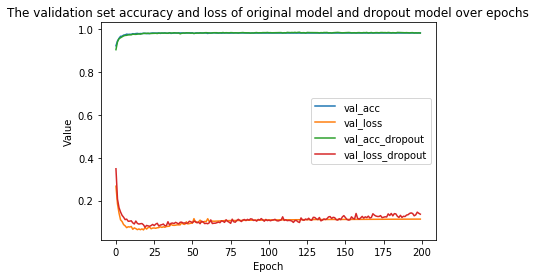

In [26]:
val_acc = result_org.history['val_acc']
val_loss = result_org.history['val_loss']
val_acc_dropout = result_dropout.history['val_acc']
val_loss_dropout = result_dropout.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.plot(val_acc_dropout)
plt.plot(val_loss_dropout)
plt.legend(['val_acc', 'val_loss', 'val_acc_dropout', 'val_loss_dropout'])
plt.title('The validation set accuracy and loss of original model and dropout model over epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

##### How does this new model perform relative to the old model?

We see from the graph that the dropout model performs better in most epochs, especially in the range of epoch 50 and epoch 150 the dropout model has lower validation set loss and higher validation set accuracy; but the orginial model has the lowest validation loss in all 20 epochs.

#### part(iii). Weight regularization

In [16]:
# build artchicture - L1 regularization
l1_network = models.Sequential()
l1_network.add(layers.Dense(512, activation='relu', kernel_regularizer= regularizers.l1(0.001), input_shape=(28 * 28,)))
l1_network.add(layers.Dense(512, kernel_regularizer= regularizers.l1(0.001), activation='relu'))
l1_network.add(layers.Dense(512, kernel_regularizer= regularizers.l1(0.001), activation='relu'))
l1_network.add(layers.Dense(512, kernel_regularizer= regularizers.l1(0.001), activation='relu'))
l1_network.add(layers.Dense(10, activation='softmax'))

# build artchicture - L2 regularization
l2_network = models.Sequential()
l2_network.add(layers.Dense(512, activation='relu', kernel_regularizer= regularizers.l2(0.001), input_shape=(28 * 28,)))
l2_network.add(layers.Dense(512, kernel_regularizer= regularizers.l2(0.001), activation='relu'))
l2_network.add(layers.Dense(512, kernel_regularizer= regularizers.l2(0.001), activation='relu'))
l2_network.add(layers.Dense(512, kernel_regularizer= regularizers.l2(0.001), activation='relu'))
l2_network.add(layers.Dense(10, activation='softmax'))

In [20]:
# Fit the model
l1_network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1 = l1_network.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

l2_network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2 = l2_network.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 10s 199us/step - loss: 0.9369 - acc: 0.9559 - val_loss: 0.5051 - val_acc: 0.9310
Epoch 2/200
50000/50000 [==============================] - 10s 203us/step - loss: 0.5827 - acc: 0.9595 - val_loss: 0.4298 - val_acc: 0.9567
Epoch 3/200
50000/50000 [==============================] - 9s 176us/step - loss: 0.5672 - acc: 0.9601 - val_loss: 0.4312 - val_acc: 0.9548
Epoch 4/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.5667 - acc: 0.9608 - val_loss: 0.4858 - val_acc: 0.9393
Epoch 5/200
50000/50000 [==============================] - 9s 184us/step - loss: 0.5692 - acc: 0.9604 - val_loss: 0.4613 - val_acc: 0.9477
Epoch 6/200
50000/50000 [==============================] - 8s 164us/step - loss: 0.5697 - acc: 0.9596 - val_loss: 0.4638 - val_acc: 0.9484
Epoch 7/200
50000/50000 [==============================] - 8s 169us/step - loss: 0.5673 - acc: 0.9606 - val_loss: 

50000/50000 [==============================] - 8s 156us/step - loss: 0.5579 - acc: 0.9618 - val_loss: 0.4380 - val_acc: 0.9549
Epoch 118/200
50000/50000 [==============================] - 8s 150us/step - loss: 0.5562 - acc: 0.9612 - val_loss: 0.4744 - val_acc: 0.9447
Epoch 119/200
50000/50000 [==============================] - 8s 162us/step - loss: 0.5621 - acc: 0.9599 - val_loss: 0.4246 - val_acc: 0.9587
Epoch 120/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.5534 - acc: 0.9630 - val_loss: 0.4418 - val_acc: 0.9543
Epoch 121/200
50000/50000 [==============================] - 8s 153us/step - loss: 0.5554 - acc: 0.9621 - val_loss: 0.4325 - val_acc: 0.9567
Epoch 122/200
50000/50000 [==============================] - 8s 151us/step - loss: 0.5566 - acc: 0.9608 - val_loss: 0.4346 - val_acc: 0.9567
Epoch 123/200
50000/50000 [==============================] - 8s 151us/step - loss: 0.5589 - acc: 0.9602 - val_loss: 0.4681 - val_acc: 0.9449
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 8s 153us/step - loss: 0.1130 - acc: 0.9892 - val_loss: 0.1421 - val_acc: 0.9798
Epoch 34/200
50000/50000 [==============================] - 8s 153us/step - loss: 0.1162 - acc: 0.9876 - val_loss: 0.1401 - val_acc: 0.9789
Epoch 35/200
50000/50000 [==============================] - 8s 154us/step - loss: 0.1153 - acc: 0.9883 - val_loss: 0.1385 - val_acc: 0.9802
Epoch 36/200
50000/50000 [==============================] - 8s 153us/step - loss: 0.1163 - acc: 0.9880 - val_loss: 0.1615 - val_acc: 0.9726
Epoch 37/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.1114 - acc: 0.9888 - val_loss: 0.1518 - val_acc: 0.9748
Epoch 38/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.1151 - acc: 0.9876 - val_loss: 0.1315 - val_acc: 0.9803
Epoch 39/200
50000/50000 [==============================] - 8s 155us/step - loss: 0.1058 - acc: 0.9904 - val_loss: 0.1362 - val_acc: 0.9808
Epoch 40/200
50000/50000 [=======

50000/50000 [==============================] - 8s 164us/step - loss: 0.0818 - acc: 0.9920 - val_loss: 0.1161 - val_acc: 0.9814
Epoch 150/200
50000/50000 [==============================] - 8s 165us/step - loss: 0.0791 - acc: 0.9925 - val_loss: 0.1340 - val_acc: 0.9759
Epoch 151/200
50000/50000 [==============================] - 8s 165us/step - loss: 0.0795 - acc: 0.9922 - val_loss: 0.1260 - val_acc: 0.9769
Epoch 152/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.0793 - acc: 0.9922 - val_loss: 0.1163 - val_acc: 0.9802
Epoch 153/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.0846 - acc: 0.9913 - val_loss: 0.1598 - val_acc: 0.9699
Epoch 154/200
50000/50000 [==============================] - 9s 188us/step - loss: 0.0788 - acc: 0.9918 - val_loss: 0.1318 - val_acc: 0.9754
Epoch 155/200
50000/50000 [==============================] - 10s 203us/step - loss: 0.0795 - acc: 0.9917 - val_loss: 0.1428 - val_acc: 0.9724
Epoch 156/200
50000/50000 

In [21]:
l1_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [22]:
l2_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


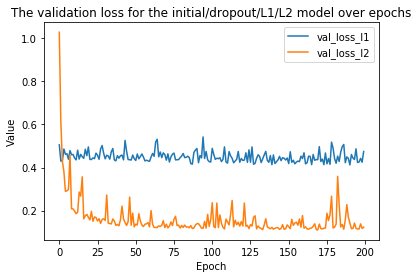

In [55]:
val_loss_l1 = result_l1.history['val_loss']
val_loss_l2 = result_l2.history['val_loss']
plt.plot(val_loss_l1)
plt.plot(val_loss_l2)
plt.legend(['val_loss_l1', 'val_loss_l2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

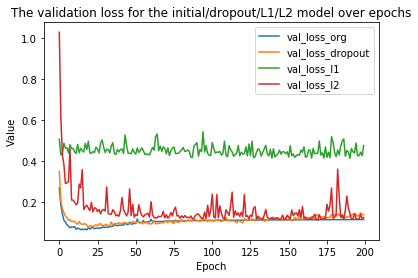

In [27]:
val_loss_org = result_org.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_l1 = result_l1.history['val_loss']
val_loss_l2 = result_l2.history['val_loss']
plt.plot(val_loss_org)
plt.plot(val_loss_dropout)
plt.plot(val_loss_l1)
plt.plot(val_loss_l2)
plt.legend(['val_loss_org', 'val_loss_dropout', 'val_loss_l1', 'val_loss_l2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

##### which model appears to perform the best?

I think the dropout model perfoms the best. The l1 regulization model performs worse than the other models.

#### part(iv). Final Model

In [30]:
# Find min val loss
import numpy as np
org_min = np.min(val_loss_org)
drop_min = np.min(val_loss_dropout)
l1_min = np.min(val_loss_l1)
l2_min = np.min(val_loss_l2)
print("Main model min:", org_min)
print("Drop model min:", drop_min)
print("L1 reg model min:", l1_min)
print("L2 reg model min:", l2_min)

Main model min: 0.0627911566377
Drop model min: 0.0753969041228
L1 reg model min: 0.411923750782
L2 reg model min: 0.110740471935


In [32]:
# Find min epoch
new_epoch_count =  np.argmin(val_loss_org) + 1
print("The optimal epoch for the main model is:", new_epoch_count)

The optimal epoch for the main model is: 19


In [35]:
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
full_fit = network_org.fit(train_images, train_labels, epochs= new_epoch_count, batch_size= 512)
test_loss, test_acc = network_org.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

Epoch 1/19
50000/50000 [==============================] - 6s 112us/step - loss: 3.2249e-04 - acc: 1.0000
Epoch 2/19
50000/50000 [==============================] - 3s 56us/step - loss: 3.2249e-04 - acc: 1.0000
Epoch 3/19
50000/50000 [==============================] - 3s 62us/step - loss: 3.2249e-04 - acc: 1.0000
Epoch 4/19
50000/50000 [==============================] - 3s 56us/step - loss: 3.2249e-04 - acc: 1.0000
Epoch 5/19
50000/50000 [==============================] - 3s 65us/step - loss: 3.2249e-04 - acc: 1.0000: 0s - loss: 4.1987e-04 - acc: 1.000 - ETA: 0s - loss: 4.1434e-04 - 
Epoch 6/19
50000/50000 [==============================] - 3s 58us/step - loss: 3.2249e-04 - acc: 1.0000: 1s -
Epoch 7/19
50000/50000 [==============================] - 3s 55us/step - loss: 3.2249e-04 - acc: 1.0000
Epoch 8/19
50000/50000 [==============================] - 3s 62us/step - loss: 3.2249e-04 - acc: 1.0000
Epoch 9/19
50000/50000 [==============================] - 4s 75us/step - loss: 3.2249e-04 - a

##### How well does your model perform to the baseline from chapter 2.1 in the book?

One can see that from comparing with the baseline, the validation loss is a little higher than that in the textbook, while the validation accuracy is similar to that in the textbook.

## Part 2: Scalar regression

In [36]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [37]:
# Normalize data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

In [43]:
# Try model 1
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [44]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 20
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


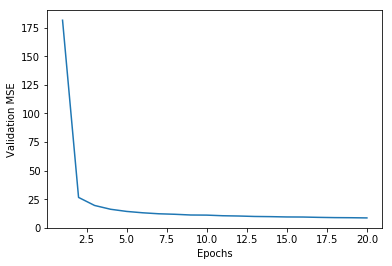

In [45]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [46]:
# Try the dropout model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [47]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)`

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


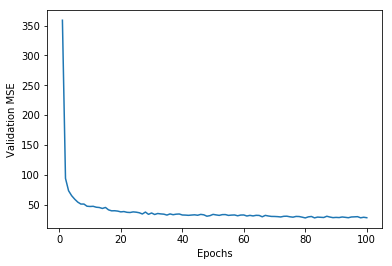

In [49]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [61]:
# Try the L1 model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', kernel_regularizer= regularizers.l1(0.001),
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer= regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [62]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


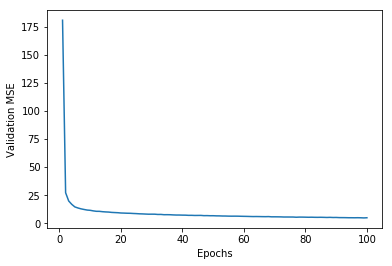

In [52]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

This model looks better than previous models

In [63]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=num_epochs, batch_size=1)

Epoch 1/100
404/404 [==============================] - 5s 13ms/step - loss: 174.6450
Epoch 2/100
404/404 [==============================] - 1s 3ms/step - loss: 24.4185
Epoch 3/100
404/404 [==============================] - 1s 3ms/step - loss: 18.9632
Epoch 4/100
404/404 [==============================] - 1s 3ms/step - loss: 16.3867
Epoch 5/100
404/404 [==============================] - 1s 3ms/step - loss: 14.8101
Epoch 6/100
404/404 [==============================] - 1s 3ms/step - loss: 14.0182
Epoch 7/100
404/404 [==============================] - 1s 3ms/step - loss: 13.0272
Epoch 8/100
404/404 [==============================] - 2s 4ms/step - loss: 12.2370
Epoch 9/100
404/404 [==============================] - 1s 3ms/step - loss: 12.2476
Epoch 10/100
404/404 [==============================] - 1s 3ms/step - loss: 11.5004
Epoch 11/100
404/404 [==============================] - 1s 3ms/step - loss: 11.7231
Epoch 12/100
404/404 [==============================] - 1s 3ms/step - loss: 10.6051

404/404 [==============================] - 1s 3ms/step - loss: 4.9259
Epoch 100/100
404/404 [==============================] - 1s 3ms/step - loss: 4.9908


In [64]:
test_mse_score = model.evaluate(test_data, test_targets)
test_mse_score

102/102 [==============================] - 1s 12ms/step


14.248315250172334

In [66]:
# Try another model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(30, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [67]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


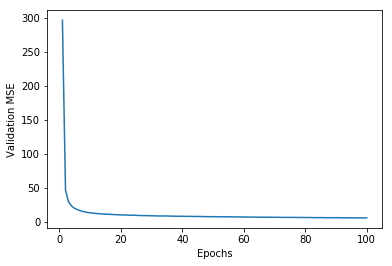

In [68]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [69]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=num_epochs, batch_size=1)

Epoch 1/100
404/404 [==============================] - 5s 12ms/step - loss: 258.6352
Epoch 2/100
404/404 [==============================] - 2s 4ms/step - loss: 33.6479
Epoch 3/100
404/404 [==============================] - 1s 4ms/step - loss: 22.2385
Epoch 4/100
404/404 [==============================] - 2s 4ms/step - loss: 18.5997
Epoch 5/100
404/404 [==============================] - 1s 3ms/step - loss: 16.1744
Epoch 6/100
404/404 [==============================] - 2s 4ms/step - loss: 14.7164
Epoch 7/100
404/404 [==============================] - 1s 3ms/step - loss: 14.2636
Epoch 8/100
404/404 [==============================] - 1s 3ms/step - loss: 13.4447
Epoch 9/100
404/404 [==============================] - 1s 3ms/step - loss: 12.2098
Epoch 10/100
404/404 [==============================] - 2s 5ms/step - loss: 12.2761
Epoch 11/100
404/404 [==============================] - 1s 4ms/step - loss: 11.7245
Epoch 12/100
404/404 [==============================] - 1s 3ms/step - loss: 11.6898

In [70]:
test_mse_score = model.evaluate(test_data, test_targets)
test_mse_score

102/102 [==============================] - 1s 14ms/step


14.439867356244255

After trying 4 models, I find that the l1 model seems to have the best test MSE: 14.24.